## Interacting with results from the VAST Pipeline

This notebook gives an example of how to use vast-tools in a notebook environment to interact with output from the VAST Pipeline (https://github.com/askap-vast/vast-pipeline).

Below are the imports required for this example. The main import required from vast-tools is the Pipeline class. Astropy objects are also imported as well as bokeh as some plots use the bokeh library. Note that we initialise the bokeh function `output_notebook()` such that bokeh outputs are shown in the notebook environment. `matplotlib.pyplot` is also imported in case we want to manage any plots produced.

In [1]:
from vasttools.pipeline import Pipeline
from bokeh.io import output_notebook
from bokeh.plotting import show
from astropy.coordinates import Angle, SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt

output_notebook()

Loading BokehJS ...

### Loading a Pipeline run

The first step is to initialise the Pipeline. If the environment variable `PIPELINE_WORKING_DIR` is defined then you do not need to provide the pipeline run directory. Otherwise, use the `project_dir` argument in the Pipeline initialisation to set the directory. Ask your admin if you are not sure where the pipeline directory is located.

In [2]:
pipe = Pipeline()

If you are unsure of the run name you want to load, you can use the `list_piperuns()` method to list all available runs.

In [3]:
pipe.list_piperuns()

['S190814bv',
 'VAST_0127-73A',
 'VAST_2118-06A',
 'VAST_Test',
 'demo',
 'demo2',
 'parallel-assoc',
 'test-data']

For this example we will load the `VAST_2118-06A` run. To do this we call the `load_run()` method and save the run to `my_run`:

In [4]:
my_run = pipe.load_run('VAST_2118-06A')

It's also possible to load multiple runs as one object using:

```pipe.load_runs(['VAST_2118-06A', 'VAST_0127-73A'])```

If you have loaded two separately you can also merge one with the other by doing:

```my_run = my_run.combine_with_run(my_other_run)```

For the purposes of this example we will continue to use the single `VAST_2118-06A` run.

The pipeline object has loaded all the outputs and information of the pipeline run. You have access to the following dataframes:

1. `my_run.images` contains the information on the images used in the pipeline run.

In [5]:
my_run.images.head()

,band_id,skyreg_id,measurements_path,polarisation,name,path,noise_path,background_path,valid,datetime,...,beam_bpa,rms_median,rms_min,rms_max,flux_percentile,centre_ra,centre_dec,xtr_radius,frequency,bandwidth
id,,,,,,,,,,,,,,,,,,,,,
3,1,2,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118+00A.EPOCH01.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,True,2019-08-27 13:38:38.810000+00:00,...,-49.187650,0.270237,0.185790,1.319099,0.0,319.652442,0.003076,6.724881,887,0
4,1,3,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118-06A.EPOCH01.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,True,2019-08-27 18:52:00.556000+00:00,...,-70.402943,0.267957,0.179847,1.726998,0.0,319.652258,-6.298900,6.740103,887,0
5,1,3,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118-06A.EPOCH02.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,True,2019-10-30 10:11:56.913000+00:00,...,75.375255,0.243300,0.163784,1.672402,0.0,319.652258,-6.298900,6.740103,887,0
6,1,3,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118-06A.EPOCH03x.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,True,2019-10-29 13:39:33.996000+00:00,...,-82.036874,0.248223,0.162059,2.286700,0.0,319.652258,-6.298900,6.740103,887,0
7,1,3,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,I,VAST_2118-06A.EPOCH05x.I.fits,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,True,2020-01-11 05:40:11.007000+00:00,...,70.737592,0.252249,0.170839,1.824399,0.0,319.652258,-6.298900,6.740103,887,0


2. `my_run.sources` contains the information on the unique sources found in the pipeline run.

In [6]:
my_run.sources.head()

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,eta_int,eta_peak,new,new_high_sigma,n_neighbour_dist,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
23765,321.972731,0.699851,1.191653,50.003472,50.003472,0.000148,0.000148,17.161000,14.401000,14.401,...,0.000000,0.000000,False,0.0,0.079768,1,1,0,0,0
23766,323.714036,-2.603739,0.984136,35.623786,50.442724,0.000061,0.000061,14.835333,15.056000,16.293,...,34.020121,4.770111,False,0.0,0.067181,6,6,0,0,0
23767,322.061919,-3.652187,1.106793,28.950530,51.572954,0.000064,0.000064,11.282667,10.265667,14.492,...,44.727039,144.445660,False,0.0,0.048327,6,6,0,0,0
23768,316.331532,-2.608983,1.114564,52.407843,64.431111,0.000059,0.000059,15.655833,14.061667,14.497,...,35.340322,3.707992,False,0.0,0.072471,6,6,0,0,0
23769,323.795974,1.830176,1.067300,40.235955,40.235955,0.000152,0.000152,15.288000,14.324000,14.324,...,0.000000,0.000000,False,0.0,0.048551,1,1,0,0,0


3. `my_run.measurements` contains the information on all of the measurements found in the pipeline run, both from selavy and forced (if used in the pipeline run). Measurements are the datapoints in time of a `source`, hence the source column tells you which source the measurement belongs to.

In [7]:
my_run.measurements.head()

,island_id,component_id,local_rms,ra,ra_err,dec,dec_err,flux_peak,flux_peak_err,flux_int,...,weight_ns,forced,id,source,d2d,dr,image,rms,selavy,frequency
0,SB9667_island_1000,SB9667_component_1000a,0.288,321.972731,0.000038,0.699851,0.000035,14.401,0.299148,17.161,...,4.551126e+07,False,13173,23765,0.0,0.0,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,887
1,SB9667_island_1001,SB9667_component_1001a,0.246,317.111595,0.000038,0.539810,0.000039,14.155,0.265187,22.503,...,4.496530e+07,False,13174,33135,0.0,0.0,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,887
2,SB9667_island_1002,SB9667_component_1002a,0.275,322.974588,0.000040,1.790072,0.000053,14.823,0.297339,29.077,...,4.214069e+07,False,13175,31569,0.0,0.0,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,887
3,SB9667_island_1003,SB9667_component_1003a,0.327,315.077869,0.000046,3.011253,0.000037,14.526,0.332071,16.204,...,4.400330e+07,False,13176,29968,0.0,0.0,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,887
4,SB9667_island_1004,SB9667_component_1004a,0.300,315.567810,0.000035,-0.299919,0.000034,14.722,0.305109,15.815,...,4.610781e+07,False,13177,39299,0.0,0.0,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/testing/vast-tools-testing/PSR_J21...,/Users/adam/GitHub/vast-pipeline/pipeline-runs...,887


You also have access to: 
* `my_run.relations` which contains the relation information of the pipeline run, i.e. what source is related to another source.
* `my_run.skyregions` which contains the sky region information of the pipeline run.

You should rarely need to access these, but are there in case they are required.

### Looking at a specific source

We can load any source into a vast-tools source instance (like those used in other notebook examples) by using the `my_run.get_source(id)` function. The `id` is the same id as listed in the sources table. Below I load the source with the `id = 2`.

In [8]:
my_source = my_run.get_source(23766)

All the normal functions are available (in the pipeline case, each datapoint is it's own epoch, e.g. to load the first datapoint you would load epoch `1`).

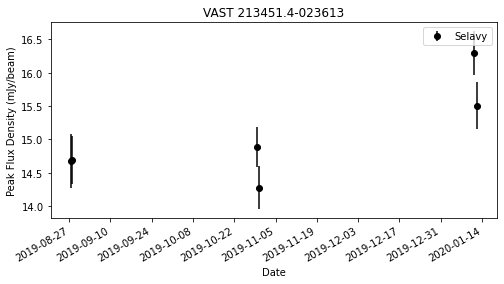

In [9]:
lc = my_source.plot_lightcurve()
lc

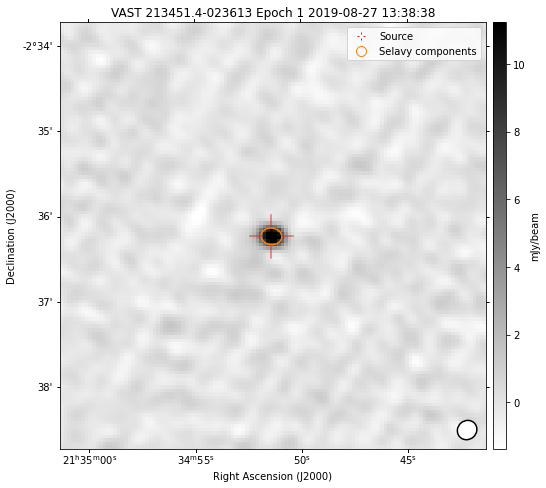

In [10]:
epoch1 = my_source.show_png_cutout(1)
epoch1

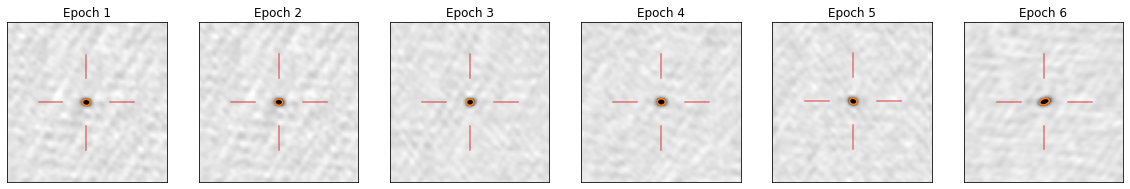

In [11]:
all_cutouts = my_source.show_all_png_cutouts(columns=6, figsize=(20,10))
all_cutouts

In [12]:
ned_results = my_source.ned_search()
ned_results

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,bytes30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,WISEA J213450.42-023602.4,323.71012,-2.60068,IrS,--,--,,,0.298,0,0,12,1,0,0,0
2,WISEA J213450.48-023617.2,323.71037,-2.60479,IrS,--,--,,,0.229,0,0,12,1,0,0,0
3,NVSS J213451-023611,323.713,-2.60325,RadioS,--,--,,1.03,0.069,0,0,1,1,0,0,0
4,WISEA J213451.99-023630.7,323.71665,-2.60856,IrS,--,--,,,0.329,0,0,12,1,0,0,0
5,WISEA J213452.05-023611.0,323.7169,-2.60306,IrS,--,--,,,0.176,0,0,12,1,0,0,0


## Performing transient and variable analysis

There are a couple of built-in analyses that you can perform on the data.

1. **Two-epoch analysis** (e.g. Mooley et al., 2016; https://ui.adsabs.harvard.edu/abs/2016ApJ...818..105M/abstract).
2. **eta-v sigma analysis** (e.g. Rowlinson et al., 2019; https://ui.adsabs.harvard.edu/abs/2019A%26C....27..111R/abstract; though no machine learning is used here, only sigma cuts).

First demo will be the two epoch analysis.

### Two-epoch analysis

The analysis is called using the `my_run.run_two_epoch_analysis` function. One input it takes is a query string such that we can filter the data, that's what is defined below:

In [13]:
my_query_string = (
    "n_measurements >= 3 "
    "& n_selavy >= 2 "
    "& n_neighbour_dist > 1./60. "
    "& 0.8 < avg_compactness < 1.4 "
    "& n_relations == 0"
    "& min_snr >= 7.0"
)

Here we are asking for sources that:

* have 3 or more measurements,
* are detected in selavy at least 2 times,
* are 1 arcmin away from their nearest neighbour,
* have an average compactness value (f_int / f_peak) between 0.8 and 1.4,
* have no relations.
* and have a minimum SNR greater of equal to 7 (this SNR metric relates to selavy detections)

**Note**: This is an example of cuts you may wish to make. Consider your own science goals when making the selections.

We can then pass this string into the two epoch function, which returns the unique epoch pairs, a dataframe containing the two epoch pair results, a dataframe of unique candidate sources and a plot. We are using the values of V=4.3 and m=0.26 (refer to the Mooley et al. paper).

In [14]:
pairs, two_epoch_df, two_epoch_candidates, plot = my_run.run_two_epoch_analysis(4.3, 0.26, query=my_query_string)

Pairs shows the unique epoch pairs and their time delta:

In [15]:
pairs.head()

,pair,td,total_pairs
id,,,
1,3_4,0 days 05:13:21.746000,828
10,6_5,0 days 20:32:22.917000,2329
15,7_8,0 days 23:55:52.827000,2328
7,4_6,62 days 18:47:33.440000,2324
3,3_6,63 days 00:00:55.186000,828


The `two_epoch_df` contains the actual calculated measurment pairs, including `Vs` and `m` values.

In [16]:
two_epoch_df.head()

,image_id_x,source,id_x,flux_peak_x,flux_peak_err_x,flux_int_x,flux_int_err_x,has_siblings_x,forced_x,image_id_y,...,flux_peak_err_y,flux_int_y,flux_int_err_y,has_siblings_y,forced_y,pair,forced_count,siblings_count,Vs,m
0,3,39300,13181,14.622,0.316728,20.938,0.732021,False,False,4,...,0.321344,15.687,0.584935,False,False,1,0,0,0.002216,0.000068
1,3,37752,13182,14.893,0.294977,17.689,0.578044,False,False,4,...,0.271332,13.179,0.440410,False,False,1,0,0,0.024951,-0.000671
2,3,34714,13184,130.143,0.324711,128.972,0.559893,False,False,4,...,0.290642,96.002,0.430193,False,False,1,0,0,0.800851,-0.002678
3,3,34715,13185,14.341,0.299628,14.319,0.518850,False,False,4,...,0.263725,10.667,0.394906,False,False,1,0,0,0.075158,-0.002090
4,3,23766,13186,14.677,0.401187,13.521,0.661287,False,False,4,...,0.355294,10.097,0.499104,False,False,1,0,0,0.024258,-0.000885


And the plot allows us to visualise the results for each pair (this is commented out by default as bokeh plots are not displayed on GitHub):

In [17]:
# use the bokeh `show` function imported at the beginning (there is no matplotlib version of this plot)
# show(plot)

The candidates returned is a convience dataframe only containing the unique pairs that meet the `Vs` and `m` thresholds.

In [18]:
two_epoch_candidates.head()

,image_id_x,source,id_x,flux_peak_x,flux_peak_err_x,flux_int_x,flux_int_err_x,has_siblings_x,forced_x,image_id_y,...,flux_peak_err_y,flux_int_y,flux_int_err_y,has_siblings_y,forced_y,pair,forced_count,siblings_count,Vs,m
6,3,23767,13192,14.475,0.280389,17.725,0.575799,False,False,5,...,0.258706,8.530,0.484249,False,False,2,0,0,18.015438,0.622639
28,3,26943,13282,13.375,0.251191,17.115,0.532406,False,False,5,...,0.215148,19.671,0.400555,False,False,2,0,0,13.007382,-0.277084
49,3,26951,13404,12.361,0.317562,13.348,0.582278,False,False,5,...,0.290452,11.285,0.584371,False,False,2,0,0,7.654085,0.307448
57,3,36243,13455,11.723,0.360835,11.795,0.628634,False,False,5,...,0.328608,21.556,0.656088,False,False,2,0,0,11.859633,-0.395977
95,3,33185,13794,95.609,0.293474,98.511,0.521070,False,False,5,...,0.291919,160.338,0.589177,False,False,2,0,0,78.695567,-0.291117


From this we can get the unique source that meet our thresholds and investigate further:

In [19]:
# Get the unique sources
unique_two_epoch_source_candidates = two_epoch_candidates['source'].unique()

# Select only those unique sources from the main sources dataframe
two_epoch_candidate_sources = my_run.sources[my_run.sources.index.isin(unique_two_epoch_source_candidates)]

We can see if any sources are marked as `new`:

In [20]:
two_epoch_candidate_sources[two_epoch_candidate_sources.new == True]

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,eta_int,eta_peak,new,new_high_sigma,n_neighbour_dist,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
26793,322.437459,-4.484952,1.258322,12.385542,25.690647,0.000062,0.000062,2.122392,1.696892,7.142,...,45.815592,74.824531,True,12.367910,0.086571,6,2,4,0,0
33006,321.551614,-9.186370,1.076647,7.398754,10.446309,0.000075,0.000075,1.554840,1.469840,3.113,...,5.691024,8.225185,True,10.099036,0.084321,5,2,3,0,0


Let's check the first one:

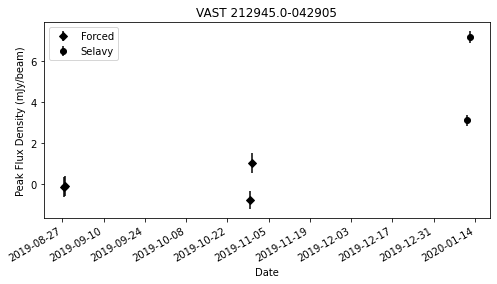

In [21]:
candidate_source = my_run.get_source(26793)
lc = candidate_source.plot_lightcurve()
lc

In [22]:
candidate_source.simbad_search()

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,RA_d,DEC_d
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,deg,deg
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,float64
CRTS J212945.0-042906,21 29 45.0466,-04 29 06.973,14,14,0.080,0.082,90,A,O,2018yCat.1345....0G,322.43769431,-4.48527042
PSR J2129-04,21 29 45.29,-04 29 11.9,6,6,--,--,0,D,,2014ApJ...795...72L,322.43871000,-4.48664000


It's `PSR J2129-04`!

### The eta-v analysis

Now we'll also run the eta-v analysis. This is called by the `my_run.run_eta_v_analysis()`. We will use the same query string as before (copied again here for clarity, but you wouldn't need to re-define it):

In [23]:
my_query_string = (
    "n_measurements >= 3 "
    "& n_selavy >= 2 "
    "& n_neighbour_dist > 1./60. "
    "& 0.8 < avg_compactness < 1.4 "
    "& n_relations == 0 "
    "& min_snr > 7.0"
)

Now we run the analysis, using the `run_eta_v_analysis` function, where we use `1 sigma` as the threshold value to select candidates. It returns the eta and v threshold values (see Rowlinson et al. paper), a dataframe of candidate sources and a plot for visualisation.

In [24]:
eta_thresh, v_thresh, eta_v_candidates, plot = my_run.run_eta_v_analysis(1.0, 1.0, query=my_query_string)
print(eta_thresh, v_thresh)

5.189863995792752 0.11009821204825321


View the plot from the analysis. The datapoints are colour coded to represent the number of selavy (i.e actual) detections.

In [25]:
# use the bokeh `show` function imported at the beginning.
# show(plot)

For the purposes of the example lets run the analysis again this time fetching a matplotlib plot and the diagnostic plot.

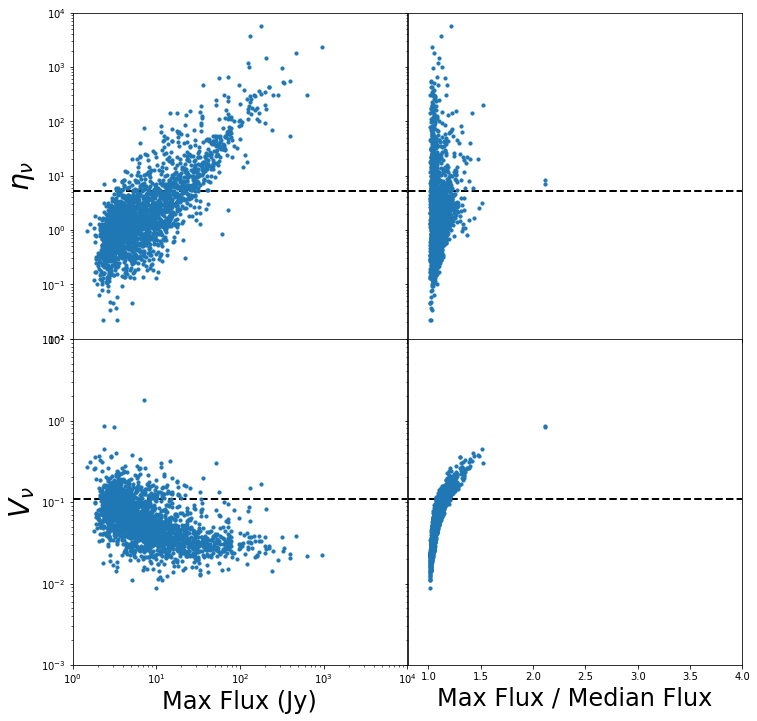

In [26]:
eta_thresh, v_thresh, eta_v_candidates, plot, diag_plot = my_run.run_eta_v_analysis(1.0, 1.0, query=my_query_string, plot_type='matplotlib', diagnostic=True)
diag_plot

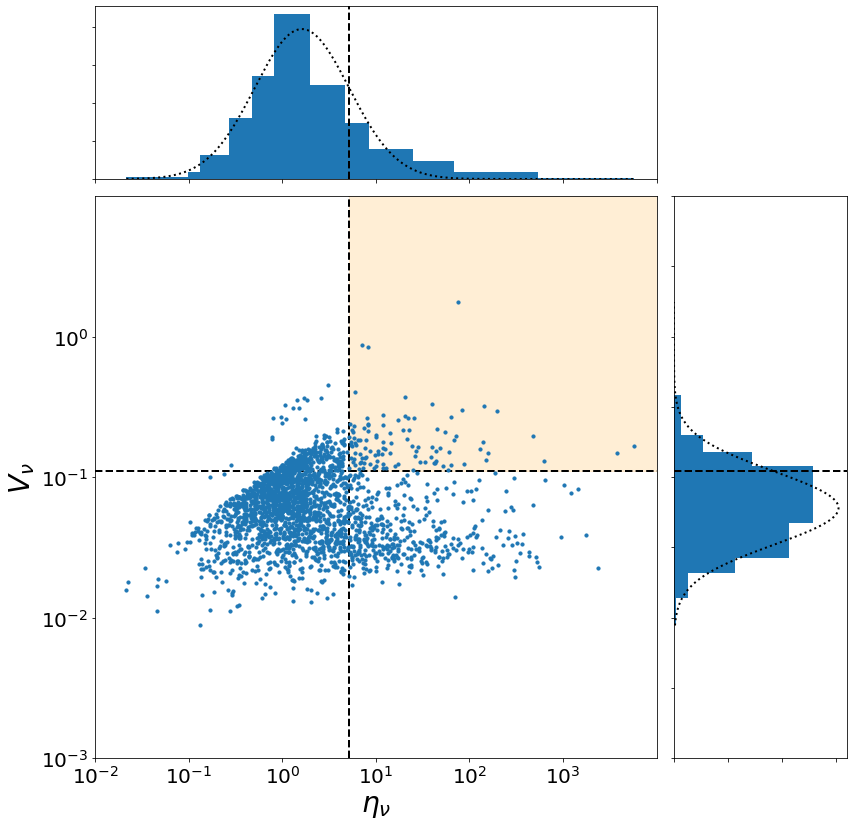

In [27]:
plot

By looking at the plot above, there is one source that is clearly beyond the 1 sigma threshold in both metrics. If you hover over the point in the bokeh plot you'll see it is source `26793` - `PSR J2129-04`.

The other 105 candidates can be explored using the candidates dataframe returned by the analysis:

In [28]:
eta_v_candidates

,wavg_ra,wavg_dec,avg_compactness,min_snr,max_snr,wavg_uncertainty_ew,wavg_uncertainty_ns,avg_flux_int,avg_flux_peak,max_flux_peak,...,eta_int,eta_peak,new,new_high_sigma,n_neighbour_dist,n_measurements,n_selavy,n_forced,n_siblings,n_relations
id,,,,,,,,,,,,,,,,,,,,,
23767,322.061919,-3.652187,1.106793,28.950530,51.572954,0.000064,0.000064,11.282667,10.265667,14.492,...,44.727039,144.445660,False,0.0,0.048327,6,6,0,0,0
23968,323.100619,-1.605233,0.986725,10.717791,21.736264,0.000080,0.000080,4.657500,4.695000,5.934,...,8.627182,10.123662,False,0.0,0.022473,6,6,0,0,0
24046,321.114488,-3.477666,1.076348,13.439216,23.482213,0.000084,0.000084,4.579833,4.243167,5.941,...,8.679739,20.308550,False,0.0,0.030164,6,6,0,0,0
24072,323.101529,-3.234671,1.103508,12.436214,29.625000,0.000080,0.000080,5.191500,4.571000,6.399,...,27.591386,40.148093,False,0.0,0.072507,6,6,0,0,0
24488,322.271743,-1.717226,1.054355,34.362369,49.572816,0.000062,0.000062,12.951333,12.480333,15.318,...,21.450077,72.230314,False,0.0,0.048762,6,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40098,314.886045,-7.606158,1.041370,29.090498,41.294872,0.000069,0.000069,8.584400,8.307800,9.663,...,3.076863,26.328259,False,0.0,0.051768,5,5,0,0,0
40102,317.057870,-6.964202,1.075593,15.717647,30.702290,0.000082,0.000082,7.373600,6.854800,8.131,...,5.407464,14.477285,False,0.0,0.043604,5,5,0,0,0
40104,323.389343,-6.618923,1.082266,14.684426,20.880137,0.000088,0.000088,5.126600,4.777800,6.097,...,4.458331,14.219549,False,0.0,0.059198,5,5,0,0,0


### Creating a MOC of the Pipeline Job

There is also the ability to create a MOC file of the pipeline job. This can be useful to see the area and to also use the MOC to get pre-filtered surveys to crossmatch with (see the catalogue crossmatching example notebook).

For the MOC demo we'll use two runs:

In [29]:
my_two_runs = pipe.load_runs(['VAST_2118-06A', 'VAST_0127-73A'])

The MOC is created by calling the following (it may take a few seconds, or minutes for large runs):

In [30]:
my_two_runs_moc = my_two_runs.create_moc()

We can then plot the MOC as demonstrated in the other notebook examples (and in the mocpy documentation).

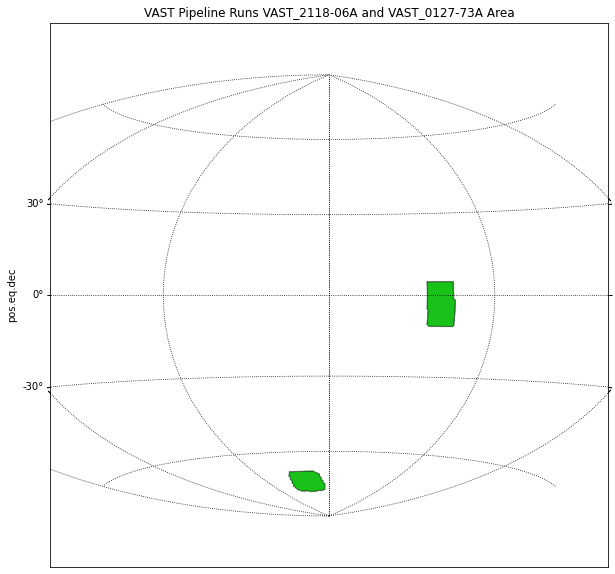

In [31]:
from mocpy import World2ScreenMPL

fig = plt.figure(figsize=(10,10))

with World2ScreenMPL(
    fig,
    fov=200 * u.deg,
    center=SkyCoord(0,0, unit='deg', frame='icrs'),
    coordsys="icrs",
    rotation=Angle(0, u.degree),
) as wcs:
    ax = fig.add_subplot(111, projection=wcs)
    ax.set_title("VAST Pipeline Runs VAST_2118-06A and VAST_0127-73A Area")
    ax.grid(color="black", linestyle="dotted")
    my_two_runs_moc.fill(ax=ax, wcs=wcs, alpha=0.9, fill=True, linewidth=0, color="#00bb00")
    my_two_runs_moc.border(ax=ax, wcs=wcs, alpha=0.5, color="black")
        
fig